In [3]:
from pandas import read_excel
import matplotlib.pyplot as plt
import numpy as np

### Measuring discharge using a tracer pulse

In [7]:
df = read_excel('data/salt_trace.xls', 
                index_col=0, 
                parse_dates=True, 
                skiprows=65, 
                skipfooter=1,
                names=['level', 'temp', 'cond']
                )

In [10]:
df

,level,temp,cond
2009-06-09 16:35:48,968.533,12.003,0.257
2009-06-09 16:35:49,968.233,10.307,0.255
2009-06-09 16:35:50,969.000,9.573,0.255
2009-06-09 16:35:51,968.233,9.273,0.255
2009-06-09 16:35:52,972.400,9.010,0.255
...,...,...,...
2009-06-09 16:48:53,995.533,8.423,0.257
2009-06-09 16:48:54,995.533,8.423,0.257
2009-06-09 16:48:55,995.533,8.423,0.257
2009-06-09 16:48:56,995.300,8.423,0.257


Text(0, 0.5, 'Specific conductance (mS/cm)')

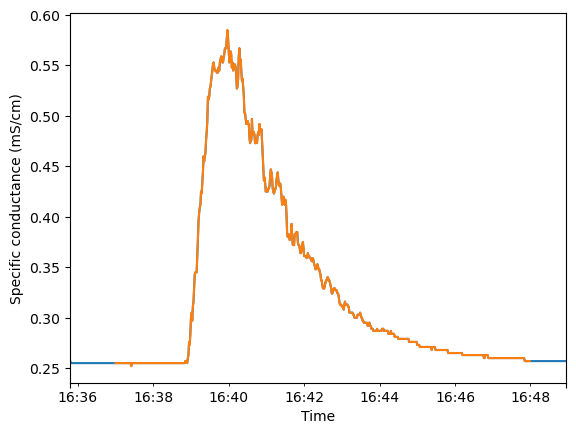

In [20]:
cond = df['cond']
cond.plot()
cond_pulse = cond['2009/06/09 16:37':'2009/06/09 16:47']
cond_pulse.plot()
plt.xlabel('Time')
plt.ylabel('Specific conductance (mS/cm)')

In [15]:

k = 0.7 # 0.7 (g*cm)/(mS*L) conversion constant from mS/cm to g/L NaCl
cond_background = 0.255
C_salt = k*(cond_pulse - cond_background) 

C_salt

2009-06-09 16:37:00    0.0000
2009-06-09 16:37:01    0.0000
2009-06-09 16:37:02    0.0000
2009-06-09 16:37:03    0.0000
2009-06-09 16:37:04    0.0000
                        ...  
2009-06-09 16:47:55    0.0014
2009-06-09 16:47:56    0.0014
2009-06-09 16:47:57    0.0014
2009-06-09 16:47:58    0.0014
2009-06-09 16:47:59    0.0014
Name: cond, Length: 660, dtype: float64

In [16]:
dt = 1 # one second between measurements
m = 500 # mass of salt in grams


To calculate discharge from the conductivity measurements, we use

$$Q = \frac{m}{\Sigma_i (C_{salt,i} dt)}$$,

where $Q$ is the discharge, $C_{salt,i}$ is the timeseries of salt concentrations, and $dt$ is the time between consecutive conductivity measurements.

In [18]:
Q = m / (C_salt.sum()*dt)
print('discharge =', Q, 'L/s')

discharge = 14.708131831927235 L/s


### Measuring discharge at a weir

### Measuring discharge with a bucket and stopwatch

In [21]:
# Read in time and volume data (or bucket depth/diameter) from spreadsheet

# Spreadsheet will have 5 duplicate measurements for each site that need to be averaged

In [ ]:
#Calculate discharges and average